In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/mmalik17/Rakamin-Personal-Project/main/Customer-Personality-Analysis-for-Marketing-Campaign/marketing_campaign_data.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# TASK 1

## Feature Engineering 

In [16]:
#Feature Engineering Umur
    #Menghitung Umur
df['Age'] = 2023 - df['Year_Birth']

#Feature Engineering Jumlah Anak
df['Children'] = df['Kidhome']+df['Teenhome']

#Feature Engineering Total Pengeluaran
df['Spending'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

#Feature Engineering Total Transaksi
df['Transaction'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

#Feature Engineering conversion rate dengan #Response / #Visit
    #Menghitung jumlah response pada campaign-campaign sebelumnya
df['Total_Accepted'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
    #Jumlah visit dihitung dari NumWebVisitMonth, maka rumus conversion rate adalah
df['ConversionRate'] = df['Total_Accepted']/(df['NumWebVisitsMonth']+0.5)
    #ket: angka 0,01 digunakan untuk mencegah nilai infinite
    

    
    #Pengelompokan Umur
def segmen_umur(x):
    if x<18:
        return 'usia 0-17'
    elif x<25:
        return 'usia 18-24'
    elif x<35:
        return 'usia 25-34'
    elif x<45:
        return 'usia 35-44'
    elif x<55:
        return 'usia 45-54'
    elif x<65:
        return 'usia 55-64'
    else:
        return 'usia 65 tahun keatas'
df['Age_Segment'] = df['Age'].apply(lambda x: segmen_umur(x))

In [17]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df["Year_Customer"] = df["Dt_Customer"].apply(lambda x: x.year)

## Exploratory Data Analysis Income, Spending, dan Age

<AxesSubplot:xlabel='Income', ylabel='ConversionRate'>

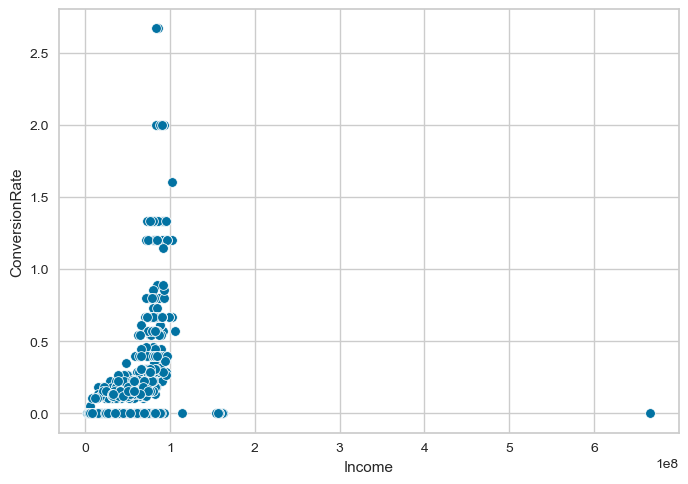

In [18]:
sns.scatterplot(data = df, x ='Income',y='ConversionRate')

<AxesSubplot:xlabel='Spending', ylabel='ConversionRate'>

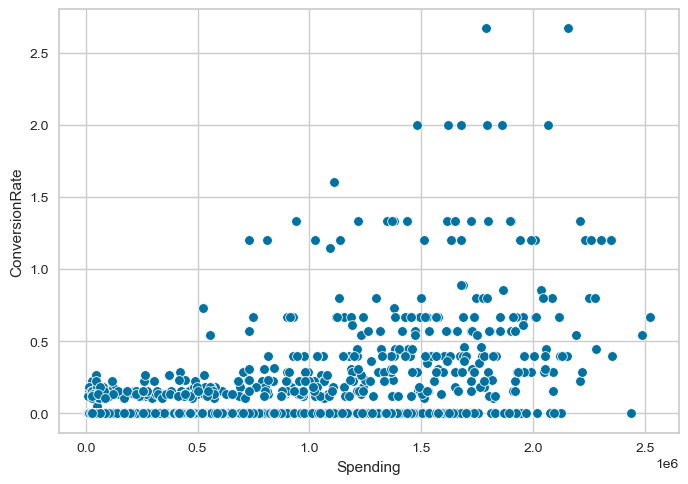

In [19]:
sns.scatterplot(data = df, x ='Spending',y='ConversionRate')

Text(0, 0.5, 'Conversion Rate Mean')

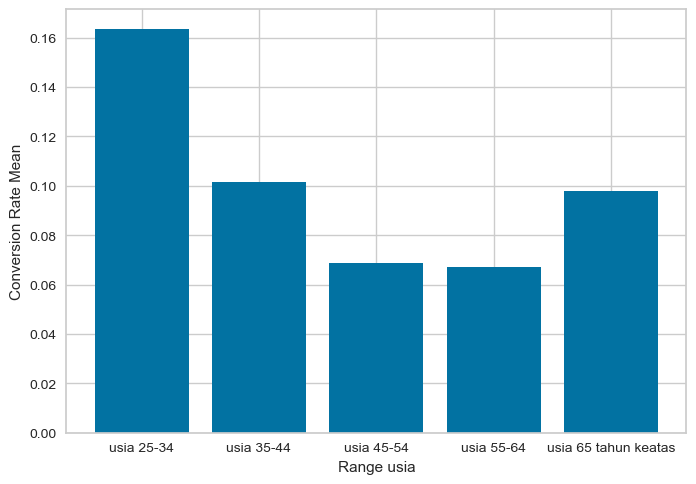

In [20]:
df_group = df.groupby('Age_Segment').agg({'ConversionRate':'mean'}).reset_index()
x = df_group['Age_Segment'].to_list()
y = df_group['ConversionRate'].to_list()

plt.bar(x, y)
plt.xlabel('Range usia')
plt.ylabel('Conversion Rate Mean')

# TASK 2

## 1. Pengecekan missing data dan duplicated data

In [21]:
print("Jumlah Missing Data:")
print(df.isnull().sum())
print('-------------------')
print("Jumlah Duplicate Data:")
print(df.duplicated().sum())

Jumlah Missing Data:
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Children                0
Spending                0
Transaction             0
Total_Accepted          0
ConversionRate          0
Age_Segment             0
Year_Customer    

jumlah data yang hilang tidak signifikan, hanya 24 baris dari 2240 baris (hanya sekitar 1% saja), itu pun hanya terdapat pada 1 kolom saja. Maka dari itu, data hilang dihapus saja.

## 2. Membuang data yang tidak diperlukan

Data yang tidak diperlukan:
- Row yang berisi missing value
- Kolom yang nilainya tidak berhubungan dengan keputusan pembelian, spt ID
- Kolom yang sudah dilakukan feature enguneer, seperti Age, Year_Birth, dsb

In [22]:
#drop missing data 
df = df.dropna()

#drop kolom yang tidak diperlukan
df = df.drop(['Unnamed: 0','ID','Year_Birth','Dt_Customer','Age','Kidhome','Teenhome','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
              'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue'], axis=1)

## 3. Feature Encoding

Kolom yang dilakukan feature encoding secara langsung adalah kolom segmen umur. Hal ini dikarenakan pada dataset diatas, range umur pada satu segmen umur adalah 10 tahun kecuali segmen terbawah dan teratas.

Adapun untuk kolom pendidikan, angka pada encoding ditentukan dari jumlah tahun studi dari awal masuk SMA sampai pendidikan terakhir, dengan asumsi masa pendidikan SMA selama 3 tahun, D3 selama 3 tahun, S1 selama 4 tahun, S2 selama 2 tahun, dan S3 selama 2 tahun

In [23]:
#label encoding segmen umur
label_segmen = {
    'usia 0-17':1,
    'usia 18-24':2,
    'usia 25-34':3,
    'usia 35-44':4,
    'usia 45-54':5,
    'usia 55-64':6,
    'usia 65 tahun keatas':7
    }
df['Age_Segment'] = df['Age_Segment'].map(label_segmen) 

#label encoding Edukasi
label_edukasi = {
    'SMA':3,
    'D3':6,
    'S1':7,
    'S2':9,
    'S3':11
    }
df['Education'] = df['Education'].map(label_edukasi) 

#label encoding marital status
label_mar_status = {
    'Menikah':1,
    'Bertunangan':1,
    'Lajang':0,
    'Cerai':0,
    'Janda':0,
    'Duda':0
    }
df['Marital_Status'] = df['Marital_Status'].map(label_mar_status)

df

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Children,Spending,Transaction,Total_Accepted,ConversionRate,Age_Segment,Year_Customer
0,7,0,58138000.0,58,3,8,10,4,7,0,1,0,1617000,25,0,0.000000,7,2012
1,7,0,46344000.0,38,2,1,1,2,5,0,0,2,27000,6,0,0.000000,7,2014
2,7,1,71613000.0,26,1,8,2,10,4,0,0,0,776000,21,0,0.000000,6,2013
3,7,1,26646000.0,26,2,2,0,4,6,0,0,1,53000,8,0,0.000000,4,2014
4,11,1,58293000.0,94,5,5,3,6,5,0,0,1,422000,19,0,0.000000,4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,7,1,61223000.0,46,2,9,3,4,5,0,0,1,1341000,18,0,0.000000,6,2013
2236,11,1,64014000.0,56,7,8,2,5,7,0,0,3,444000,22,1,0.133333,7,2014
2237,7,0,56981000.0,91,1,2,3,13,6,0,0,0,1241000,19,1,0.153846,4,2014
2238,9,1,69245000.0,8,2,6,5,10,3,0,0,1,843000,23,0,0.000000,7,2014


## 4.Feature Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

# pisahkan dataset menjadi kolom input dan kolom output
X = df.drop(['Response'], axis=1)
Y = df['Response']

#proses std scaler
std =  X.columns.to_list()
stdscaler = StandardScaler()

#fit train data
stdscaler.fit(X[std])

#transform train data
X[std] = stdscaler.transform(X[std])

In [25]:
X

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Children,Spending,Transaction,Total_Accepted,ConversionRate,Age_Segment,Year_Customer
0,-0.532874,-1.348829,0.234063,0.310532,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.097812,-1.264803,1.675488,1.319446,-0.439265,-0.342481,1.383124,-1.500343
1,-0.532874,-1.348829,-0.234559,-0.380509,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.097812,1.405806,-0.962358,-1.157987,-0.439265,-0.342481,1.383124,1.417393
2,-0.532874,0.741384,0.769478,-0.795134,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.097812,-1.264803,0.280250,0.797881,-0.439265,-0.342481,0.504396,-0.041475
3,-0.532874,0.741384,-1.017239,-0.795134,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.097812,0.070501,-0.919224,-0.897205,-0.439265,-0.342481,-1.253059,1.417393
4,1.577669,0.741384,0.240221,1.554407,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.097812,0.070501,-0.307044,0.537099,-0.439265,-0.342481,-1.253059,1.417393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.532874,0.741384,0.356642,-0.104093,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.097812,0.070501,1.217598,0.406708,-0.439265,-0.342481,0.504396,-0.041475
2236,1.577669,0.741384,0.467539,0.241428,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.097812,2.741110,-0.270546,0.928273,1.033369,0.202108,1.383124,1.417393
2237,-0.532874,-1.348829,0.188091,1.450751,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.097812,-1.264803,1.051696,0.537099,1.033369,0.285891,-1.253059,1.417393
2238,0.522398,0.741384,0.675388,-1.417072,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.097812,0.070501,0.391404,1.058664,-0.439265,-0.342481,1.383124,1.417393


# TASK 3 

<AxesSubplot:>

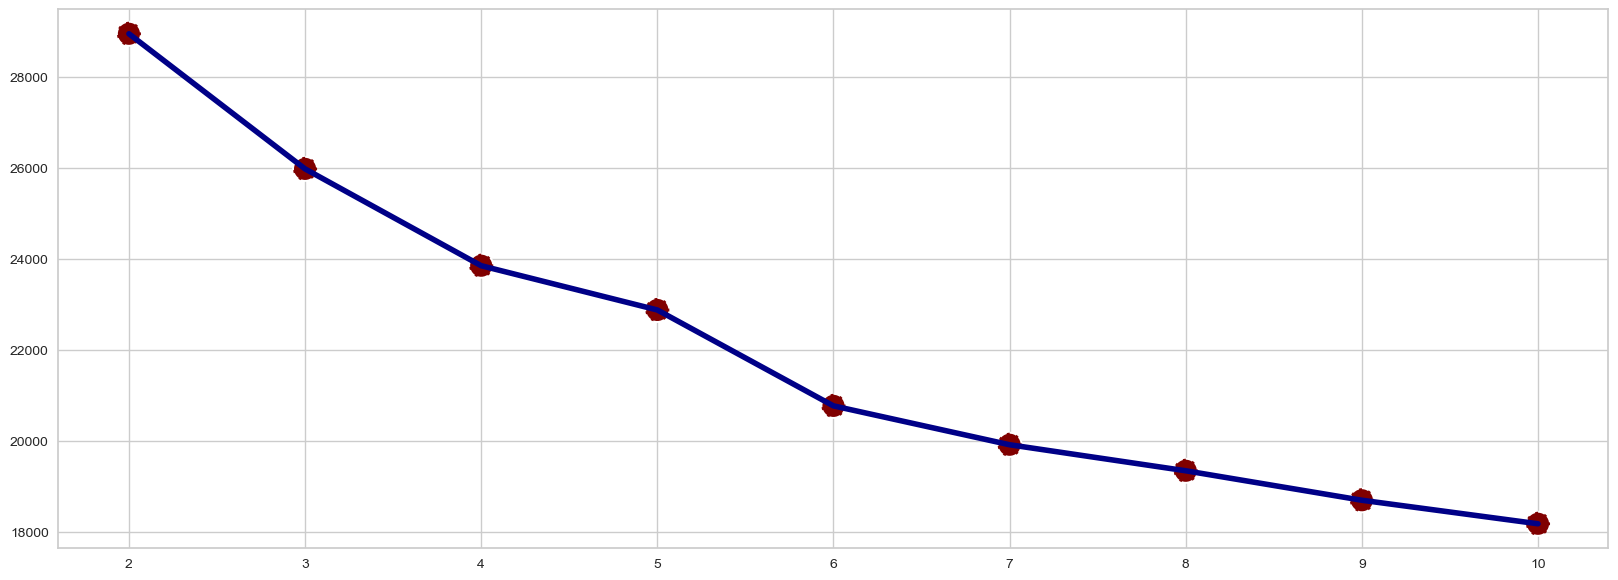

In [26]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 7))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

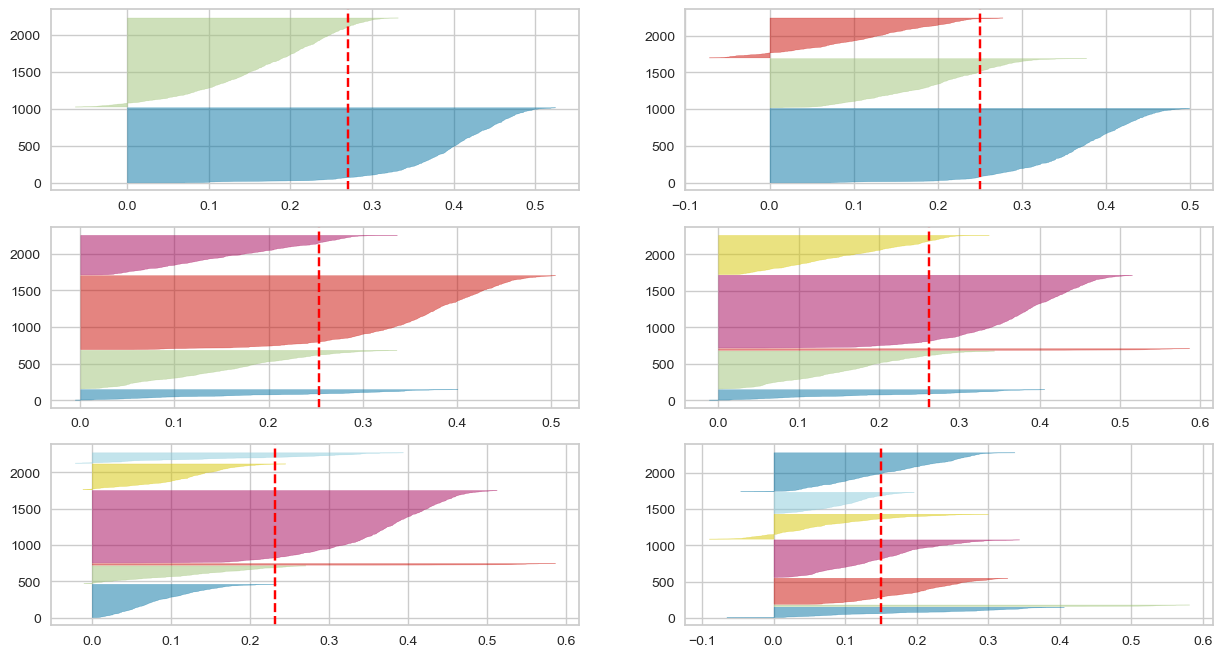

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(X)

# TASK 4

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)

df['cluster'] = kmeans.labels_
df.sample(7)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Children,Spending,Transaction,Total_Accepted,ConversionRate,Age_Segment,Year_Customer,cluster
15,11,0,82800000.0,23,1,7,6,12,3,0,1,0,1315000,26,2,0.571429,7,2012,0
1562,7,1,24645000.0,16,1,1,0,2,8,0,0,1,17000,4,0,0.000000,4,2012,1
469,11,1,49269000.0,92,3,7,3,12,7,0,0,1,890000,25,0,0.000000,5,2012,2
1571,7,1,38998000.0,92,3,2,0,3,8,1,0,2,54000,8,0,0.000000,7,2012,1
1116,11,1,33569000.0,10,1,1,1,2,8,0,1,1,63000,5,1,0.117647,4,2013,1
575,11,1,61996000.0,27,3,6,4,8,5,0,1,1,1230000,21,3,0.545455,5,2013,0
144,7,1,41883000.0,13,3,4,2,3,7,0,0,1,312000,12,0,0.000000,4,2013,1


In [129]:
cluster_agg = df.groupby('cluster').agg({'Age_Segment':'mean','Income':'mean','Recency':'mean',
                           'Spending':'mean','Complain':'mean',
                           'ConversionRate':'mean','Total_Accepted':'mean',
                           'NumDealsPurchases':'mean',
                           'NumWebPurchases':'mean',
                           'NumCatalogPurchases':'mean',
                           'NumStorePurchases':'mean'
                          }).reset_index()
cluster_agg

,cluster,Age_Segment,Income,Recency,Spending,Complain,ConversionRate,Total_Accepted,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,5.333333,8.245504e+07,48.034722,1.621257e+06,0.006944,0.847735,2.256944,1.041667,5.118056,6.208333,8.243056
1,1,5.192460,3.500966e+07,48.999008,9.423611e+04,0.011905,0.011991,0.084325,1.886905,2.048611,0.536706,3.197421
2,2,5.786667,5.544722e+07,49.243810,7.081924e+05,0.009524,0.034738,0.249524,4.441905,6.693333,2.800000,7.363810
3,3,5.536178,7.329658e+07,49.074212,1.196711e+06,0.005566,0.061995,0.222635,1.419295,5.077922,5.591837,8.495362


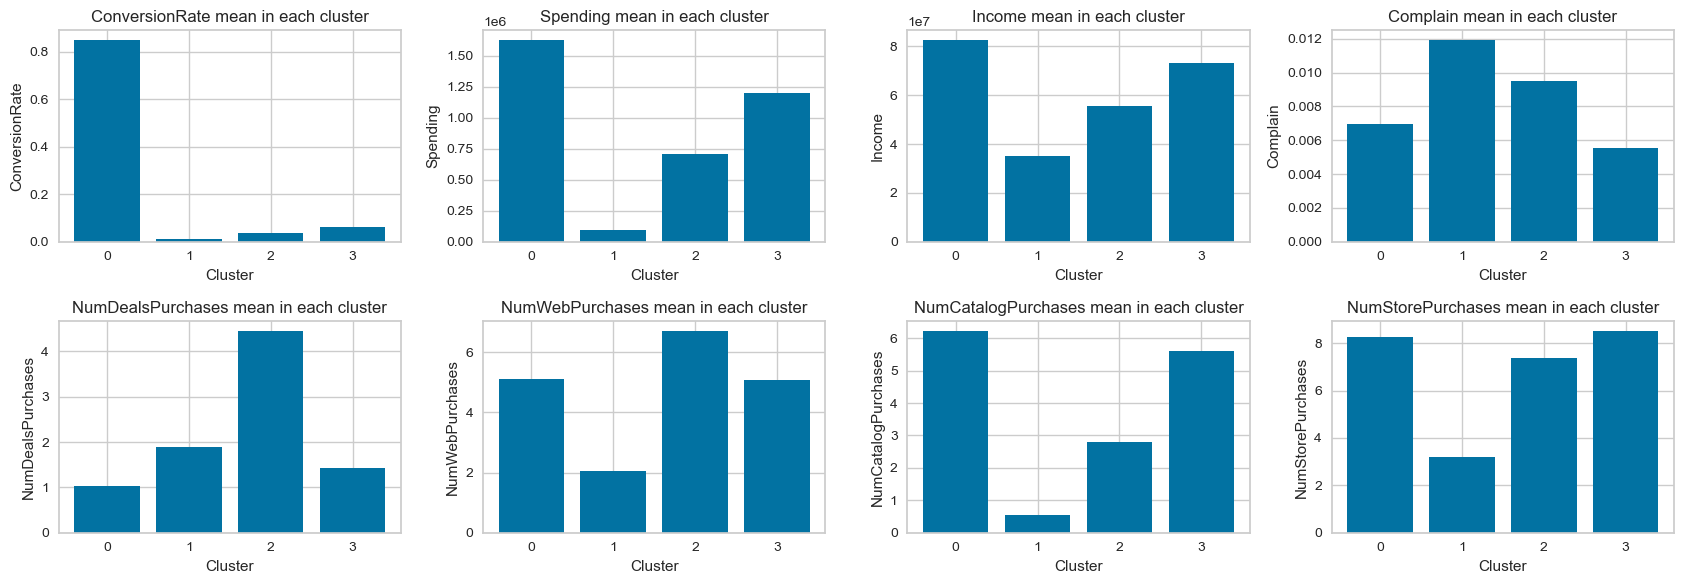

In [138]:
features = ['ConversionRate','Spending','Income','Complain',
            'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.figure(figsize=(17,6))
for i in range (0,len(features)):
    plt.subplot(2,4,i+1)
    plt.bar(cluster_agg['cluster'], cluster_agg[features[i]])
    plt.title(features[i]+' mean in each cluster')
    plt.xlabel('Cluster')
    plt.ylabel(features[i])
    plt.tight_layout()

In [81]:
agg_response_rate = df.groupby('cluster').agg({'Response':'sum','Income':'count'}).reset_index().rename(columns={'Response':'Jumlah penerima campaign','Income':'Jumlah Anggota Cluster'})
agg_response_rate

,cluster,Jumlah penerima campaign,Jumlah Anggota Cluster
0,0,83,144
1,1,86,1008
2,2,76,525
3,3,88,539


Jika diasumsikan biaya (cost) untuk melakukan campaign adalah 3 dollar, dan pendapatan (revenue) jika user menerima campaign adalah 11 dollar, maka perhitungan potensi penambahan profit jika marketing campaign hanya menyasar segmen 0 adalah sebagai berikut:

In [89]:
revenue_cluster_0 = 83*11
cost_cluster_0 = 144*3
profit_cluster_0 = revenue_cluster_0 - cost_cluster_0
print('Profit dengan clusterisasi:', profit_cluster_0)

revenue_all = df[df['Response']==1].shape[0]*11
cost_all = df.shape[0]*3
profit_all = revenue_all - cost_all 
print('Profit tanpa clusterisasi:', profit_all)

Profit dengan clusterisasi: 481
Profit tanpa clusterisasi: -2985


Clusterisasi berhasil memperbaiki profitabilitas perusahaan dari yang awalnya merugi 2985 dollar menjadi profit 481 dollar